# K Nearest Neighbors Mystery Features

## Setup

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Setting Style For Notebook
sns.set_style(style='whitegrid')

### Get the Data

In [3]:
# Importing and checking data
df = pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
# checking averages
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [5]:
# Making sure target variable is balanced
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

# Data Visualization

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


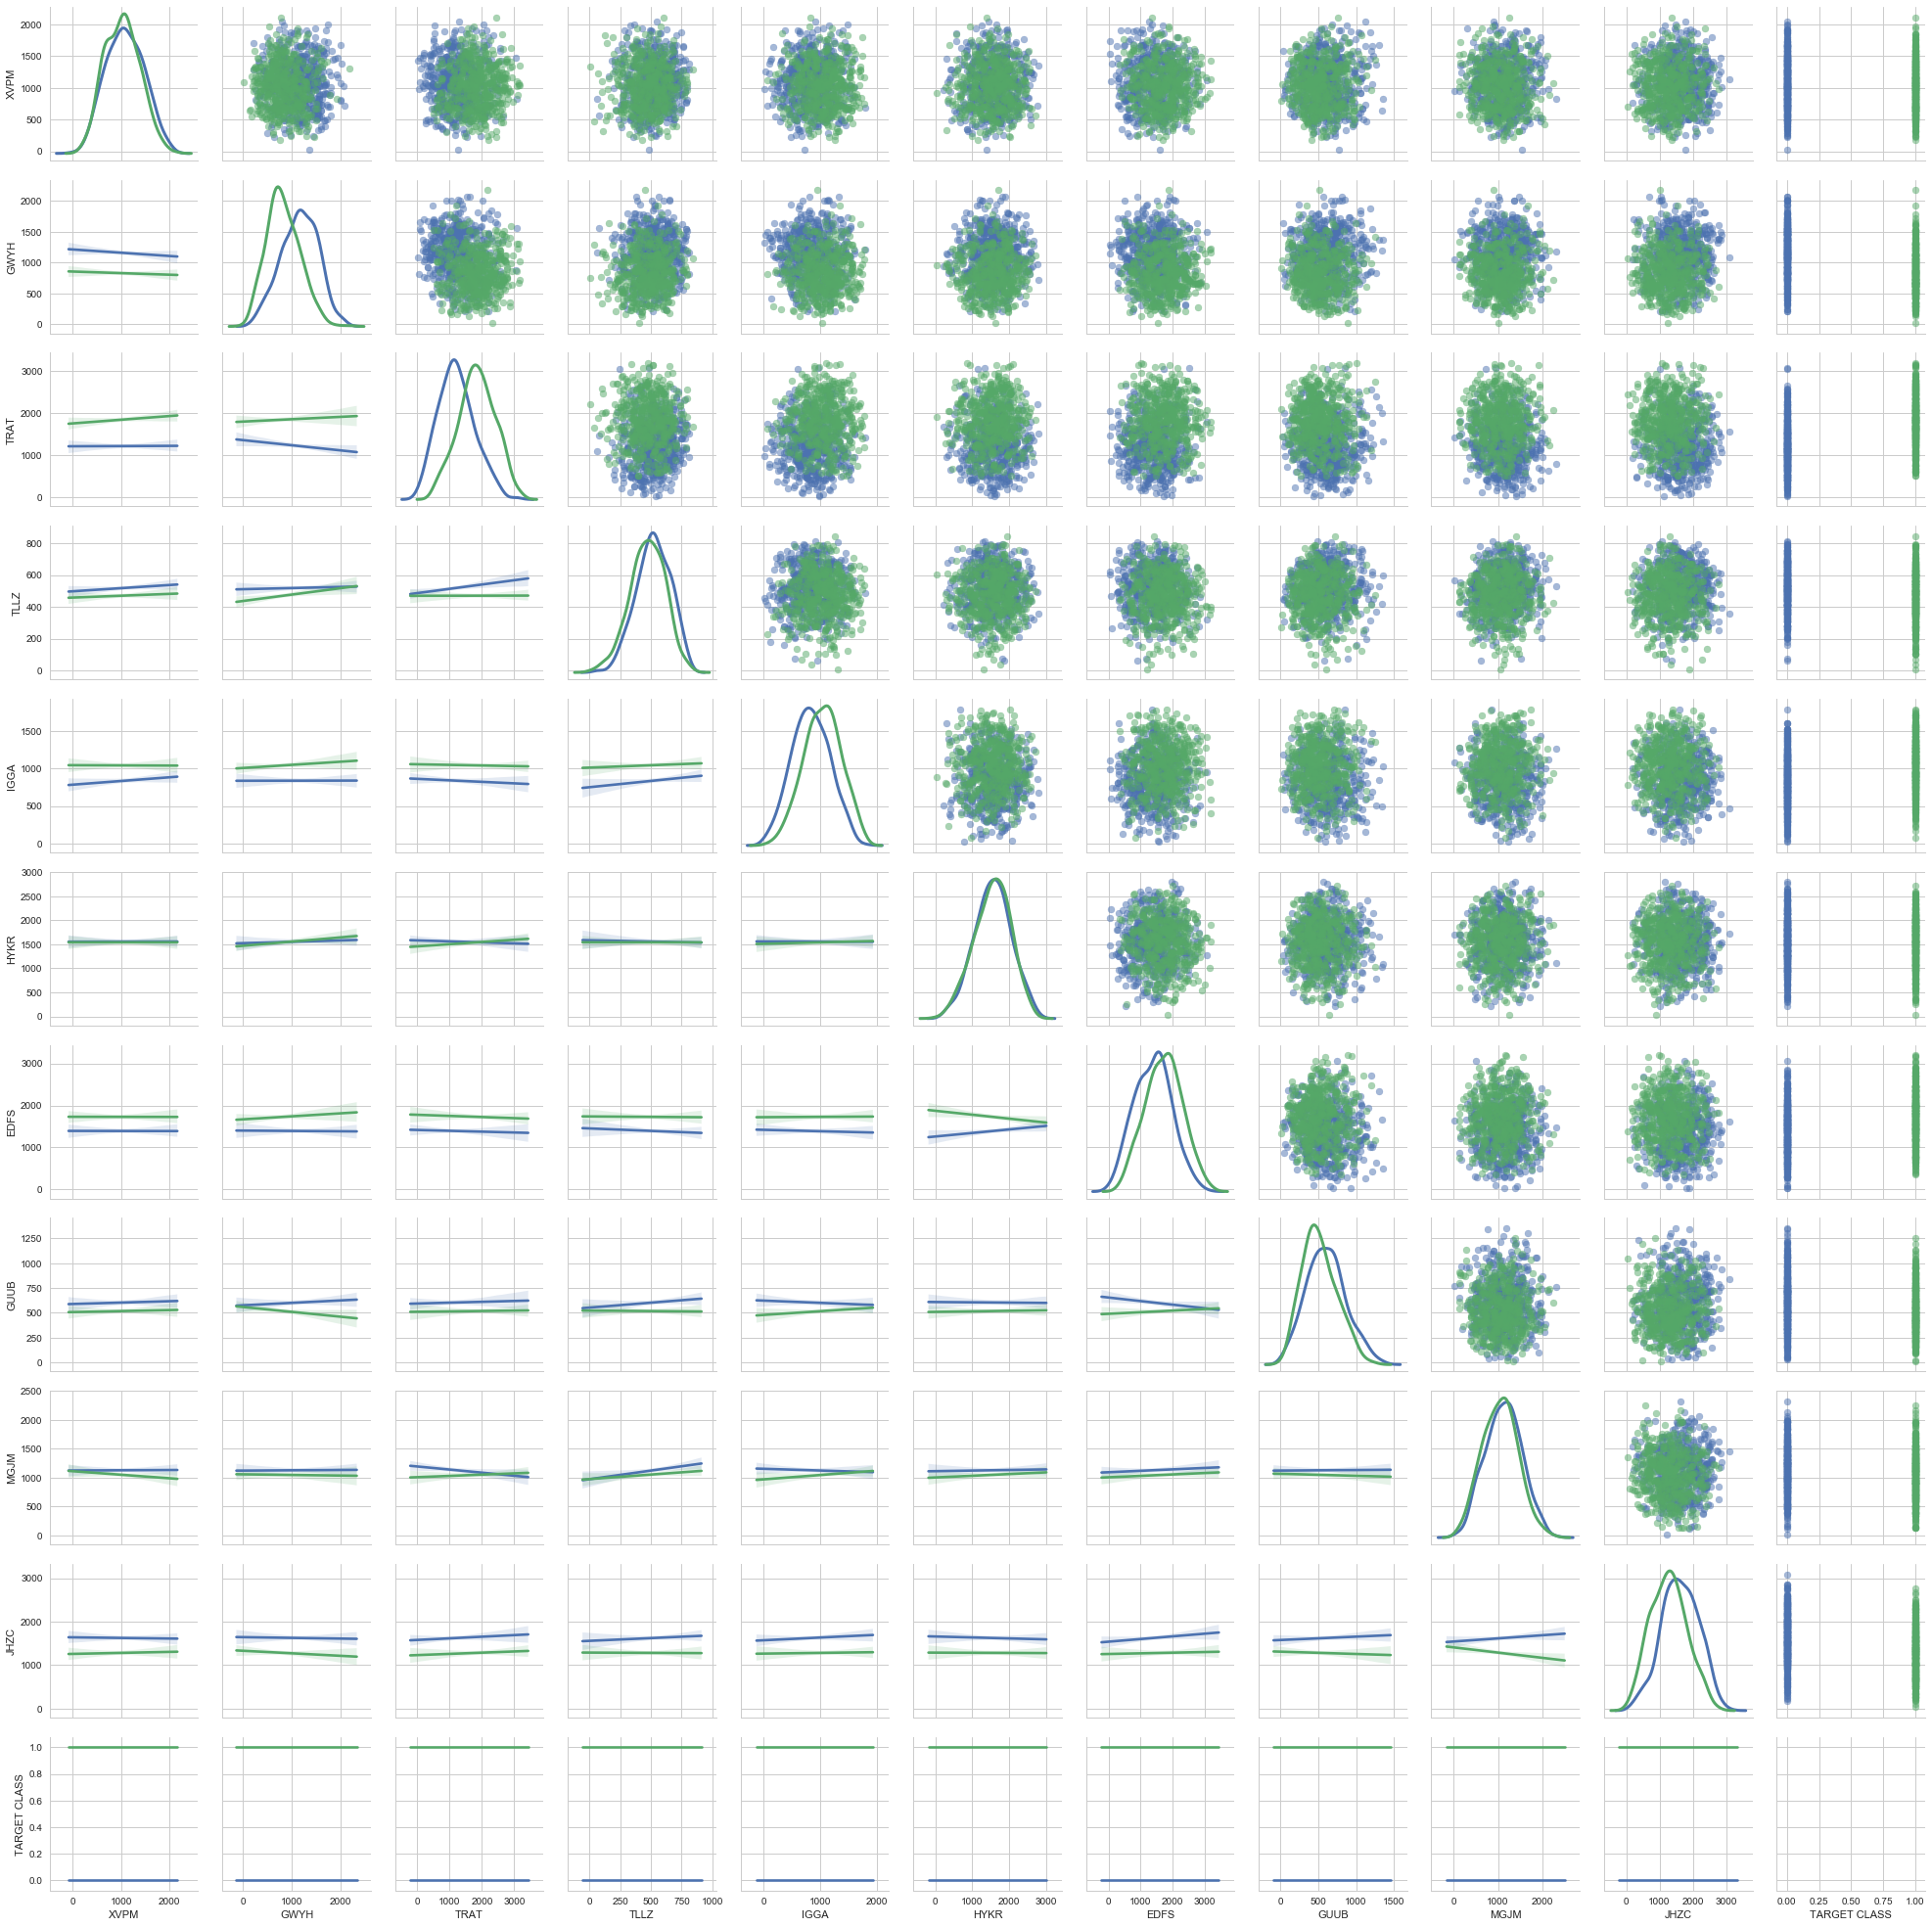

In [6]:
#creating a grid to see how columns interact with one another and their distribution
gd = sns.PairGrid(df.dropna(), hue='TARGET CLASS',diag_sharey=False)
gd.map_upper(plt.scatter, alpha=.5)
gd.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
gd.map_diag(sns.kdeplot, lw=3)

## Standardizing the Variables

### Importing Libraries

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Making features Data Frame to Maintain Copy of Starting Data
features = pd.DataFrame()
features= df

In [9]:
# Scaling features
scaled_feat = StandardScaler().fit_transform(features)

In [10]:
# Adding Scaled Features Back to Data Frame
df_scaled_feat = pd.DataFrame(scaled_feat,columns=features.columns)

In [11]:
# Double Checking Scaled Features
df_scaled_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627,-1.0
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546,1.0
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811,1.0
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793,-1.0
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762,-1.0


## Splitting Data

### Importing Libraries

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
# Fitting X with the Scaled Data Minus the Target Class
X = df_scaled_feat.drop(['TARGET CLASS'], axis=1)

In [56]:
# Fitting y With Target
y = df_scaled_feat['TARGET CLASS']

In [57]:
# Splitting Data into Training And Test Group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Fitting KNN Model With Training Data

### Importing Libraries

In [58]:
# Grabbing Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

In [59]:
# Calling KNClassifier Model
Knc = KNeighborsClassifier()

In [60]:
# Setting Up Params to Test Neighbor, p, and weight type for best values
param_grid = {'n_neighbors':[3,6,9,15,24,30,36],
             'p': [1, 2,],
             'weights': ['uniform','distance']}

In [61]:
# Setting Up Grid Model and Params
grid = GridSearchCV(Knc,param_grid,verbose=3)

In [62]:
# Applying Training Data to Grid
grid.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .... n_neighbors=3, p=1, weights=uniform, score=0.790179 -   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .... n_neighbors=3, p=1, weights=uniform, score=0.735426 -   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .... n_neighbors=3, p=1, weights=uniform, score=0.757848 -   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ... n_neighbors=3, p=1, weights=distance, score=0.790179 -   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ... n_neighbors=3, p=1, weights=distance, score=0.735426 -   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ... n_neighbors=3, p=1, weights=distance, score=0.757848 -   0.0s
[CV] n_neighbors=3, p=2, weights=uniform .............................
[CV] .... n_neig

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... n_neighbors=9, p=2, weights=distance, score=0.803571 -   0.0s
[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ... n_neighbors=9, p=2, weights=distance, score=0.784753 -   0.0s
[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ... n_neighbors=9, p=2, weights=distance, score=0.798206 -   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................
[CV] ... n_neighbors=15, p=1, weights=uniform, score=0.816964 -   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................
[CV] ... n_neighbors=15, p=1, weights=uniform, score=0.816143 -   0.0s
[CV] n_neighbors=15, p=1, weights=uniform ............................
[CV] ... n_neighbors=15, p=1, weights=uniform, score=0.811659 -   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................
[CV] .. n_neighbors=15, p=1, weights=distance, score=0.812500 -   0.0s
[CV] n_neighbors=15, p=1, weights=distance ...........................
[CV] .

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 6, 9, 15, 24, 30, 36], 'p': [1, 2], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [63]:
# Extraction Best Parameters
grid.best_params_

{'n_neighbors': 36, 'p': 2, 'weights': 'distance'}

## Predictions and Evaluations


In [64]:
# Saving Models Predictions
grid_pred = grid.predict(X_test)

In [65]:
# Importing Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [67]:
# Model evaluation
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[135  37]
 [ 23 135]]


             precision    recall  f1-score   support

       -1.0       0.85      0.78      0.82       172
        1.0       0.78      0.85      0.82       158

avg / total       0.82      0.82      0.82       330



# Conclusion

After getting a dataset with undefined features. We were able to standardize the information to mapped the distances between the points.  Allowing us to group points and predict the probablity of an outcome from their location.  Using the Nearest Neighbor model we were able to predict the Target class with 82% accuracy.  The model had 37 type 1 errors and 23 type 2 errors. 